In [1]:
import os
os.chdir('../')  # Moving up one directory to the root

Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Total samples: 6000


<Axes: xlabel='sentiment'>

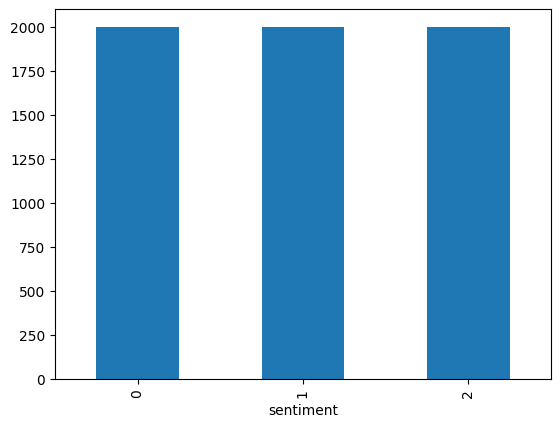

In [2]:
from data.data_processing import DataProcessor, SarcasmDetector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize processor
processor = DataProcessor()

# Load data
df = processor.load_data()

# Show basic statistics
print(f"Total samples: {len(df)}")
df['sentiment'].value_counts().plot(kind='bar')

In [3]:
# Take sample texts
sample_texts = df['text'].head(5)

# Show original vs preprocessed
for text in sample_texts:
    processed = processor.preprocess_text(text)
    print(f"Original: {text}")
    print(f"Processed: {processed}\n")

Original: Used a Groupon today to eat here and they gave tiny portions compared to normal and a sharing charge for one of my little kids.    Food was ok but the restaurant is dirty and bathroom always out of order....Dont use a Groupon at this place as they rip you off on the food portions.
Processed: Used a Groupon today to eat here and they gave tiny portions compared to normal and a sharing charge for one of my little kids.    Food was ok but the restaurant is dirty and bathroom always out of order ELLIPSIS .Dont use a Groupon at this place as they rip you off on the food portions.

Original: Its definitely better than making my own sandwich...good soups that come in a bread bowl. Let's not get past the fact that its nothing fancy....average atmosphere with average service...I would recommend to anyone for a good sandwich and soup.
Processed: Its definitely better than making my own sandwich ELLIPSIS good soups that come in a bread bowl. Let is not_NEG get past the fact that its not

In [4]:
# Test sarcasm detector
sarcasm_detector = SarcasmDetector()
test_texts = [
    "Yeah right, like that's going to work...",
    "Thanks a lot for nothing!!!",
    "This is a normal sentence."
]

for text in test_texts:
    is_sarcastic, marker = sarcasm_detector.detect_sarcasm(text)
    print(f"Text: {text}")
    print(f"Sarcastic: {is_sarcastic}, Marker: {marker}\n")

Text: Yeah right, like that's going to work...
Sarcastic: True, Marker: yeah right

Text: Thanks a lot for nothing!!!
Sarcastic: True, Marker: thanks a lot (contextual)

Text: This is a normal sentence.
Sarcastic: False, Marker: None



Text(0.5, 1.0, 'Text Length Distribution by Sentiment')

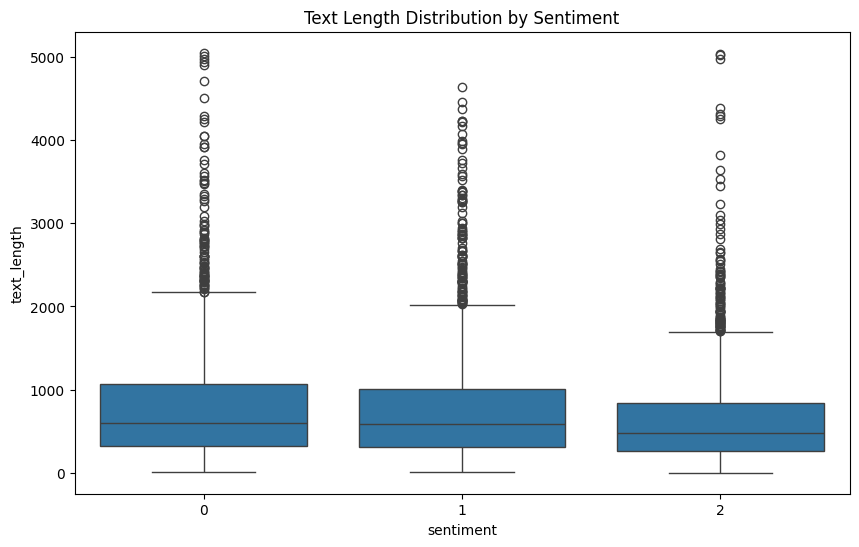

In [7]:
# Add length analysis
df['text_length'] = df['text'].str.len()
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='text_length', data=df)
plt.title('Text Length Distribution by Sentiment')

In [8]:
# Analyze special tokens, negations
def analyze_features(text):
    has_negation = any(neg in text for neg in processor.negation_words)
    has_special = any(token in text for token in processor.special_tokens)
    return has_negation, has_special

# Apply to sample
feature_analysis = df['text'].head(100).apply(analyze_features)

In [9]:
# Check for potential issues
print("Null values:", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

# Show examples of shortest/longest texts
print("\nShortest reviews:")
print(df.nsmallest(3, 'text_length')[['text', 'sentiment']])

Null values: label          0
text           0
sentiment      0
text_length    0
dtype: int64

Duplicate rows: 0

Shortest reviews:
       text  sentiment
2768      c          2
1897   Avg.          1
5285  Barf.          0


In [10]:
# Process a batch and show statistics
sample_batch = df['text'].head(100)
processed_texts, analysis = processor.process_batch(sample_batch)

print(f"Sarcasm detected: {analysis['sarcasm_count']}")
print(f"Negations found: {analysis['negation_count']}")
print(f"Special tokens: {analysis['special_tokens_count']}")

Sarcasm detected: 1
Negations found: 80
Special tokens: 35
